# Comparaison between great output and gprofiler output

This notebook is intended to compare the results obtained with the enrichment function of greatpy with those obtained with the gprofiler package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import greatpy as great
from gprofiler import GProfiler
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt 

## Compute the resultats 

### with great

In [3]:
test = "../data/tests/test_data/input/03_srf_hg19.bed"
regdom = "../data/human/hg19/regulatory_domain.bed"
size = "../data/human/hg19/chr_size.bed"

In [4]:
enrichment = great.tl.GREAT.enrichment(
    test_file=test,
    regdom_file=regdom,
    chr_size_file=size,
    annotation_file="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    )
great.tl.GREAT.set_bonferroni(enrichment)
great.tl.GREAT.set_fdr(enrichment)

,go_term,binom_p_value,binom_fold_enrichment,hypergeom_p_value,hypergeometric_fold_enrichment,binom_bonferroni,hypergeom_bonferroni,binom_fdr,hypergeom_fdr
GO:0072749,cellular response to cytochalasin B,2.21968e-12,2.27251e+05,4.28032e-02,2.33627e+01,9.23386e-09,1.00000e+00,4.61693e-09,4.65089e-01
GO:0051623,positive regulation of norepinephrine uptake,2.21968e-12,2.27251e+05,4.28032e-02,2.33627e+01,9.23386e-09,1.00000e+00,4.61693e-09,4.65089e-01
GO:0098973,structural constituent of postsynaptic actin c...,2.11740e-10,9.10526e+04,1.60543e-01,5.84068e+00,8.80839e-07,1.00000e+00,2.93613e-07,5.43858e-01
GO:0097433,dense body,6.40085e-10,1.60618e+04,1.41783e-03,1.16814e+01,2.66275e-06,1.00000e+00,6.65688e-07,3.65408e-01
GO:0032796,uropod organization,2.69880e-09,5.45449e+04,1.82991e-03,2.33627e+01,1.12270e-05,1.00000e+00,1.93909e-06,3.65408e-01
...,...,...,...,...,...,...,...,...,...
GO:0007156,homophilic cell adhesion via plasma membrane a...,9.99960e-01,1.12747e+02,9.84651e-01,3.89379e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00
GO:0007186,G protein-coupled receptor signaling pathway,9.99992e-01,2.46644e+02,1.00000e+00,3.07404e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00
GO:0016021,integral component of membrane,9.99997e-01,3.94493e+02,9.99998e-01,7.05221e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00
GO:0005887,integral component of plasma membrane,1.00000e+00,2.81852e+02,9.99970e-01,5.84068e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00


### With gprofile

#### Preprocessing

In [5]:
L = []
f = open(test)
cdc = f.readline()
while cdc != "": 
    cdc = cdc.split("\t")
    cdc = ":".join(cdc)
    cdc = cdc.strip()
    L.append(cdc[3:])
    cdc = f.readline()

In [6]:
back = pd.read_csv(regdom,sep="\t",comment="#",
                    names=["Chr", "Chr_Start", "Chr_End","Name","tss","Strand"],dtype={"Chr":"object", "Chr_Start":"int64", "Chr_End":"int64","Name":"object","tss":"int64","Strand":"object"})
back = list(back["Name"])

#### Computation

In [7]:
gp_no_correct = GProfiler(return_dataframe=True)
gp_no_correct = gp_no_correct.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,user_threshold=0.005,
            )

gp_no_correct = gp_no_correct.loc[(gp_no_correct["source"] == "GO:MF")|(gp_no_correct["source"] == "GO:CC")|(gp_no_correct["source"] == "GO:BP")]

In [8]:
gp_no_correct

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
105,GO:MF,GO:0000062,fatty-acyl-CoA binding,1.00000e+00,False,"""Binding to a fatty-acyl-CoA, any derivative o...",21,277,1,17730,3.61011e-03,4.76190e-02,query_1,"[GO:0120227, GO:1901567]"
9867,GO:BP,GO:0044725,chromatin reprogramming in the zygote,1.00000e+00,False,"""The global reprogramming of epigenetic modifi...",2,277,1,17730,3.61011e-03,5.00000e-01,query_1,[GO:0043045]
9868,GO:BP,GO:0044721,"protein import into peroxisome matrix, substra...",1.00000e+00,False,"""The process by which the cargo protein is rel...",1,277,1,17730,3.61011e-03,1.00000e+00,query_1,"[GO:0016558, GO:0032984]"
9869,GO:BP,GO:0044706,multi-multicellular organism process,1.00000e+00,False,"""A multicellular organism process which involv...",207,277,3,17730,1.08303e-02,1.44928e-02,query_1,[GO:0032501]
9870,GO:BP,GO:0044703,multi-organism reproductive process,1.00000e+00,False,"""A biological process that directly contribute...",198,277,2,17730,7.22022e-03,1.01010e-02,query_1,[GO:0022414]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18181,GO:BP,GO:2000379,positive regulation of reactive oxygen species...,1.00000e+00,False,"""Any process that activates or increases the f...",65,277,1,17730,3.61011e-03,1.53846e-02,query_1,"[GO:0031325, GO:0072593, GO:2000377]"
18182,GO:BP,GO:2000377,regulation of reactive oxygen species metaboli...,1.00000e+00,False,"""Any process that modulates the frequency, rat...",134,277,1,17730,3.61011e-03,7.46269e-03,query_1,"[GO:0031323, GO:0072593]"
18183,GO:BP,GO:2000370,positive regulation of clathrin-dependent endo...,1.00000e+00,False,"""Any process that activates or increases the f...",5,277,1,17730,3.61011e-03,2.00000e-01,query_1,"[GO:0048260, GO:0072583, GO:2000369]"
18184,GO:BP,GO:2000369,regulation of clathrin-dependent endocytosis,1.00000e+00,False,"""Any process that modulates the frequency, rat...",18,277,2,17730,7.22022e-03,1.11111e-01,query_1,"[GO:0048259, GO:0072583]"


#### Add the GProfiler pvalue on the BinomP_and_HypergeomP df

In [9]:
val = []
for i in enrichment.index: 
    try : 
        val.append(float(gp_no_correct.loc[gp_no_correct["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment["gprofile_p_val"] = val


## Plot the p-value without correction

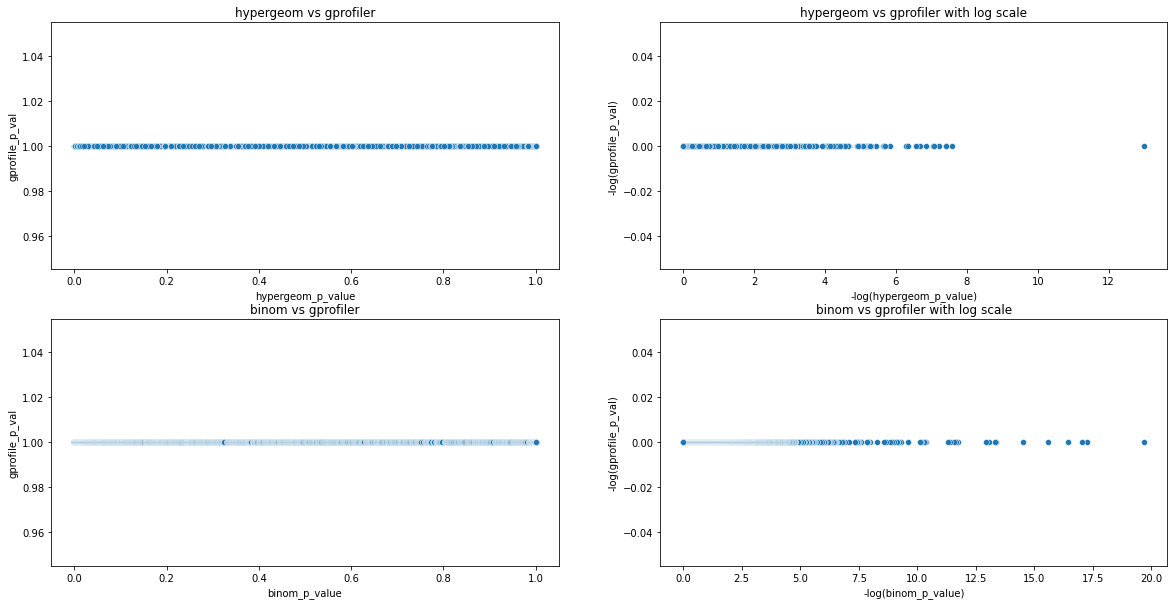

In [10]:
fig,ax = plt.subplots(2,2,figsize = (20,10))
great.pl.scatterplot(enrichment,"hypergeom_p_value","gprofile_p_val",minus_log10=False,ax=ax[0,0],title="hypergeom vs gprofiler")
great.pl.scatterplot(enrichment,"hypergeom_p_value","gprofile_p_val",minus_log10=True,ax = ax[0,1],title="hypergeom vs gprofiler with log scale")
great.pl.scatterplot(enrichment,"binom_p_value","gprofile_p_val",minus_log10=False,ax = ax[1,0],title="binom vs gprofiler")
great.pl.scatterplot(enrichment,"binom_p_value","gprofile_p_val",minus_log10=True,ax=ax[1,1],title="binom vs gprofiler with log scale")
plt.show() 

We can see that the values are totally different between the one returned by greatpy and GProfile.

This difference is related to the fact that profile forces to use a multiple test correction. 

# Comparison with a fdr correction

In [11]:
gp_correct_fdr = GProfiler(return_dataframe=True)
gp_correct_fdr = gp_correct_fdr.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,
            user_threshold=0.005,
            significance_threshold_method="fdr")

gp_correct_fdr = gp_correct_fdr.loc[(gp_correct_fdr["source"] == "GO:MF")|(gp_correct_fdr["source"] == "GO:CC")|(gp_correct_fdr["source"] == "GO:BP")]

gp_correct_bonferroni = GProfiler(return_dataframe=True)
gp_correct_bonferroni = gp_correct_bonferroni.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,
            user_threshold=0.005,
            significance_threshold_method="fdr")

gp_correct_bonferroni = gp_correct_bonferroni.loc[(gp_correct_bonferroni["source"] == "GO:MF")|(gp_correct_bonferroni["source"] == "GO:CC")|(gp_correct_bonferroni["source"] == "GO:BP")]

In [12]:
val=[]
for i in enrichment.index: 
    try : 
        val.append(float(gp_correct_fdr.loc[gp_correct_fdr["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment["gprofile_p_val_fdr"] = val

val=[]
for i in enrichment.index: 
    try : 
        val.append(float(gp_correct_bonferroni.loc[gp_correct_bonferroni["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment["gprofile_p_val_bonferroni"] = val

## Plot of the p-value with correction and bonferroni

In [13]:
enrichment

,go_term,binom_p_value,binom_fold_enrichment,hypergeom_p_value,hypergeometric_fold_enrichment,binom_bonferroni,hypergeom_bonferroni,binom_fdr,hypergeom_fdr,gprofile_p_val,gprofile_p_val_fdr,gprofile_p_val_bonferroni
GO:0072749,cellular response to cytochalasin B,2.21968e-12,2.27251e+05,4.28032e-02,2.33627e+01,9.23386e-09,1.00000e+00,4.61693e-09,4.65089e-01,NaN,NaN,NaN
GO:0051623,positive regulation of norepinephrine uptake,2.21968e-12,2.27251e+05,4.28032e-02,2.33627e+01,9.23386e-09,1.00000e+00,4.61693e-09,4.65089e-01,NaN,NaN,NaN
GO:0098973,structural constituent of postsynaptic actin c...,2.11740e-10,9.10526e+04,1.60543e-01,5.84068e+00,8.80839e-07,1.00000e+00,2.93613e-07,5.43858e-01,NaN,NaN,NaN
GO:0097433,dense body,6.40085e-10,1.60618e+04,1.41783e-03,1.16814e+01,2.66275e-06,1.00000e+00,6.65688e-07,3.65408e-01,NaN,NaN,NaN
GO:0032796,uropod organization,2.69880e-09,5.45449e+04,1.82991e-03,2.33627e+01,1.12270e-05,1.00000e+00,1.93909e-06,3.65408e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0007156,homophilic cell adhesion via plasma membrane a...,9.99960e-01,1.12747e+02,9.84651e-01,3.89379e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,8.51916e-01,8.51916e-01
GO:0007186,G protein-coupled receptor signaling pathway,9.99992e-01,2.46644e+02,1.00000e+00,3.07404e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,9.86784e-01,9.86784e-01
GO:0016021,integral component of membrane,9.99997e-01,3.94493e+02,9.99998e-01,7.05221e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,7.87548e-01,7.87548e-01
GO:0005887,integral component of plasma membrane,1.00000e+00,2.81852e+02,9.99970e-01,5.84068e-01,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,1.00000e+00,7.92393e-01,7.92393e-01


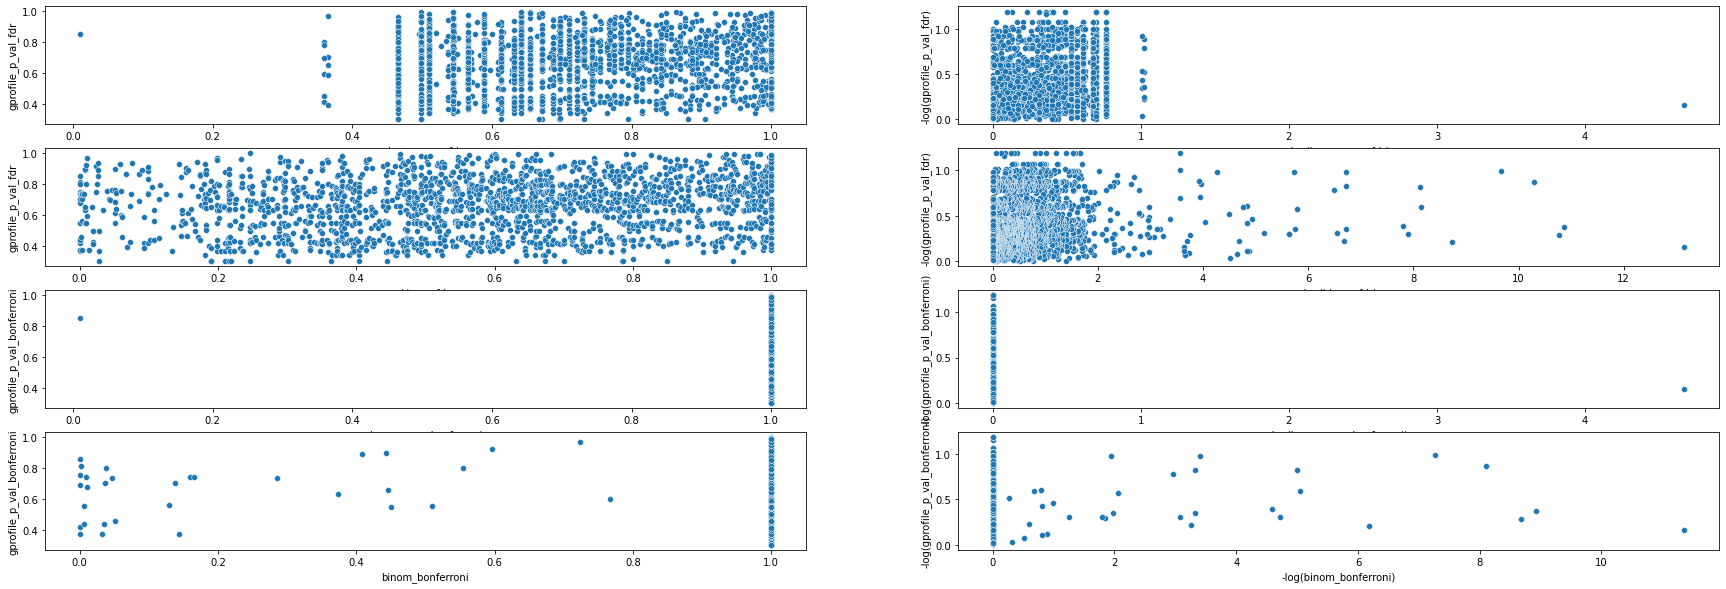

In [14]:
fig,ax = plt.subplots(4,2,figsize = (30,10))
great.pl.scatterplot(enrichment,"hypergeom_fdr","gprofile_p_val_fdr",minus_log10=False,ax=ax[0,0])
great.pl.scatterplot(enrichment,"hypergeom_fdr","gprofile_p_val_fdr",minus_log10=True,ax=ax[0,1])
great.pl.scatterplot(enrichment,"binom_fdr","gprofile_p_val_fdr",minus_log10=False,ax=ax[1,0])
great.pl.scatterplot(enrichment,"binom_fdr","gprofile_p_val_fdr",minus_log10=True,ax=ax[1,1])

great.pl.scatterplot(enrichment,"hypergeom_bonferroni","gprofile_p_val_bonferroni",minus_log10=False,ax=ax[2,0])
great.pl.scatterplot(enrichment,"hypergeom_bonferroni","gprofile_p_val_bonferroni",minus_log10=True,ax=ax[2,1])
great.pl.scatterplot(enrichment,"binom_bonferroni","gprofile_p_val_bonferroni",minus_log10=False,ax=ax[3,0])
great.pl.scatterplot(enrichment,"binom_bonferroni","gprofile_p_val_bonferroni",minus_log10=True,ax=ax[3,1])
plt.show() 
